## Aim: 
### Weather Prediction
>**BONUS:** 3 Machine Learning Models have been used for the task and their accuracies compared at the end.

### About the dataset:
The dataset consists of past weather data of Seattle(USA).
The dataset consists of the following attributes:
1. Date
2. Precipitation Information
3. Minimum Temperature
4. Maximum Temperature
5. Windspeed
6. Weather type  

`Weather type` classifies the weather in the following groups:
- Drizzle
- Rain
- Sun
- Snow
- Fog

#### Importing the libraries:

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

#### Reading the csv:

In [46]:
# data=pd.read_csv(r"C:\Users\super\Software\Mega\Academics\5th sem labs\DS Lab\Datasets\seattle-weather.csv")
data=pd.read_csv("/home/ayan/mega/Academics/5th sem labs/DS Lab/Datasets/seattle-weather.csv")

In [47]:
data.sample(10)

,date,precipitation,temp_max,temp_min,wind,weather
1003,2014-09-30,0.0,19.4,12.2,2.6,sun
790,2014-03-01,0.5,7.2,4.4,4.7,rain
1395,2015-10-27,0.0,16.1,7.8,1.7,fog
1315,2015-08-08,0.0,25.0,15.6,3.6,fog
891,2014-06-10,0.0,20.0,12.2,2.9,sun
22,2012-01-23,0.0,8.3,1.1,3.6,rain
610,2013-09-02,0.0,27.8,17.2,2.1,sun
1388,2015-10-20,0.0,17.8,10.6,1.8,fog
954,2014-08-12,12.7,27.2,17.2,3.1,rain
61,2012-03-02,2.0,6.7,3.9,5.1,rain


### Analysing the data:

In [48]:
data.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [49]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
precipitation,1461.0,3.029432,6.680194,0.0,0.0,0.0,2.8,55.9
temp_max,1461.0,16.439083,7.349758,-1.6,10.6,15.6,22.2,35.6
temp_min,1461.0,8.234771,5.023004,-7.1,4.4,8.3,12.2,18.3
wind,1461.0,3.241136,1.437825,0.4,2.2,3.0,4.0,9.5


In [50]:
data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [51]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

> No missing data found in the dataset

### Now converting data data type to date time format

In [52]:
data['date'] = pd.to_datetime(data['date'])

In [53]:
data.sample(10)

,date,precipitation,temp_max,temp_min,wind,weather
887,2014-06-06,0.0,25.0,10.6,3.2,sun
1360,2015-09-22,0.0,18.9,7.8,2.0,sun
71,2012-03-12,19.3,8.3,0.6,6.2,snow
694,2013-11-25,0.0,12.2,2.2,0.5,sun
431,2013-03-07,7.4,12.2,5.0,2.5,rain
1082,2014-12-18,13.0,9.4,6.7,3.1,rain
105,2012-04-15,0.0,16.1,7.2,2.9,rain
372,2013-01-07,2.3,10.0,4.4,7.3,rain
1107,2015-01-12,0.0,11.1,4.4,1.6,fog
19,2012-01-20,13.5,7.2,-1.1,2.3,snow


### Count number of distinct elements in specified axis.

In [54]:
data.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

### Data Visualization

### Distribution of different weather conditions:

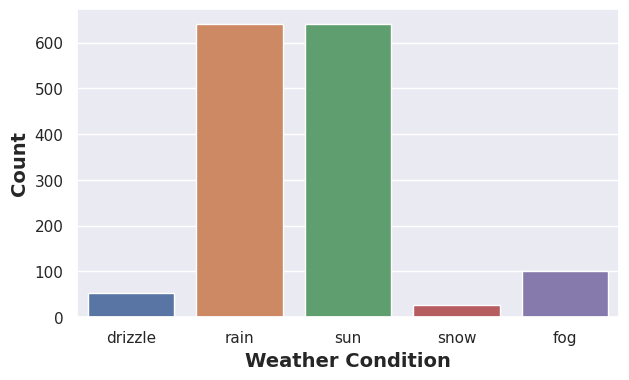

In [55]:
plt.figure(figsize=(7,4))
sns.countplot(x = 'weather',data = data)
plt.xlabel("Weather Condition",fontweight='bold',size=14)
plt.ylabel("Count",fontweight='bold',size=14)
plt.show()

### Lineplot of maximum temperature 

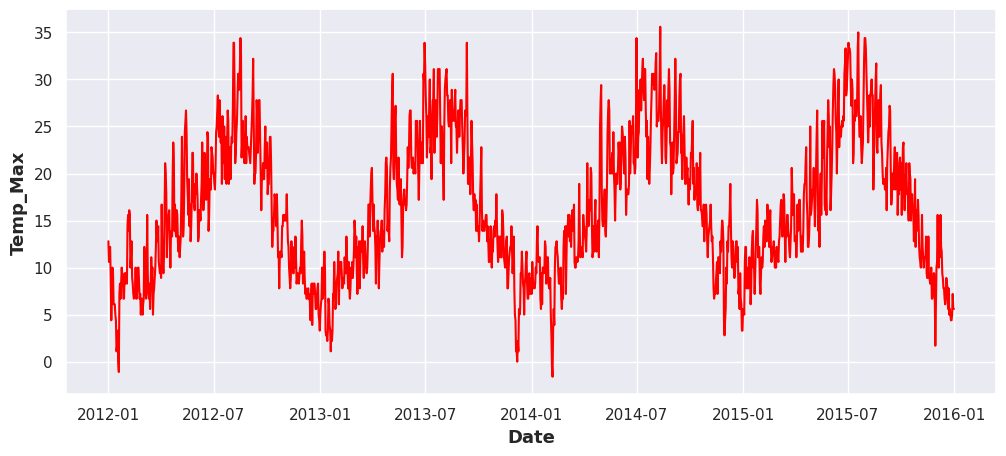

In [56]:
plt.figure(figsize=(12,5))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_max',data=data, color='red')
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Max",fontweight='bold',size=13)
plt.show()

### Pairplot

<Figure size 1400x800 with 0 Axes>

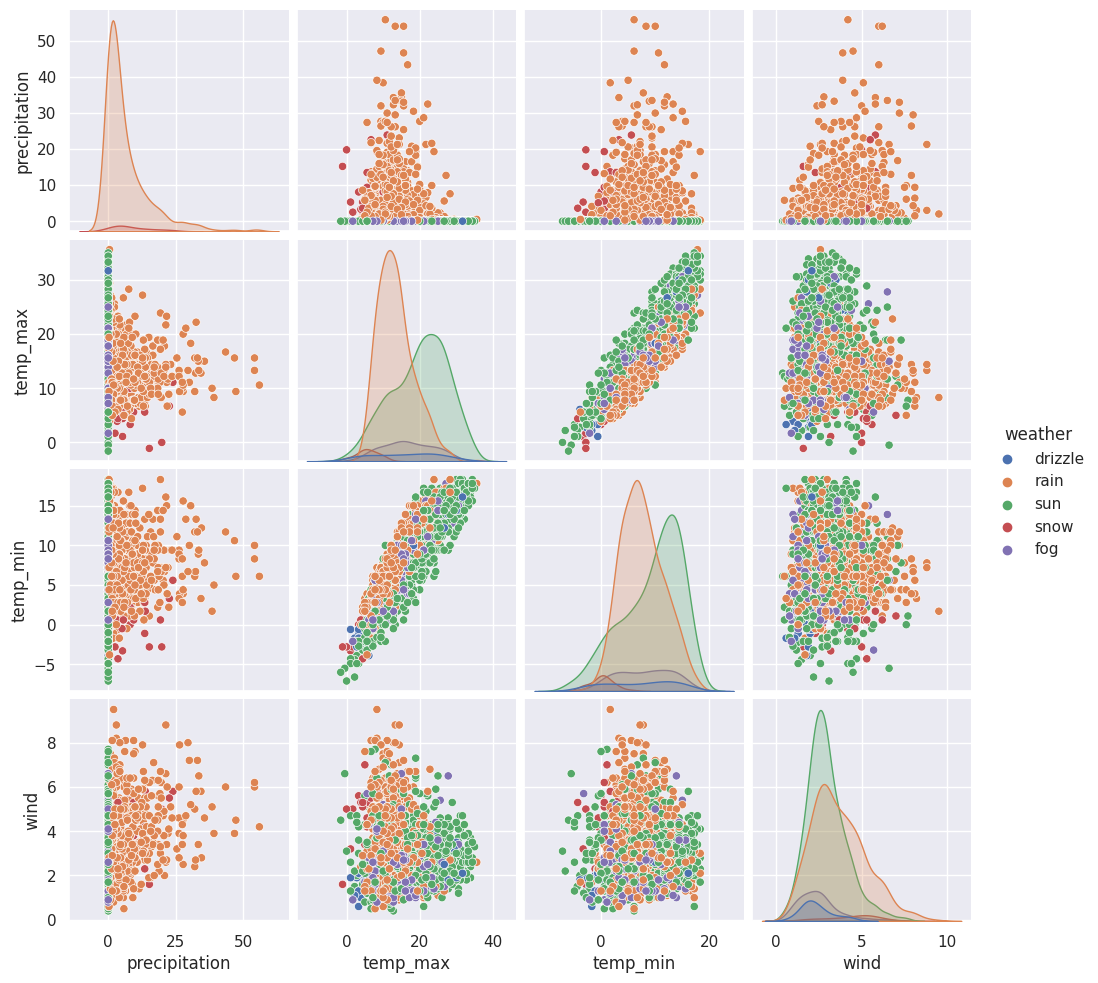

In [57]:
plt.figure(figsize=(14,8))
sns.pairplot(data.drop('date',axis=1),hue='weather')
plt.show()

### Model Building and Training

In [58]:
classes={
        'drizzle':0,
        'fog':1,
        'rain':2,
        'snow':3,
        'sun':4
}

Dropping `date` as its not useful for our model.

In [59]:
dataset=data.drop('date', axis=1)

In [60]:
dataset['weather']=dataset['weather'].astype('category')
dataset['weather']=dataset['weather'].cat.codes

#### Preparing X data and Y data for model training

In [61]:
x = dataset.drop('weather',axis=1)
y = dataset['weather']

In [62]:
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [63]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int8

#### Split the dataset into train and test


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

In [65]:
print("*"*40)
print("Shape of x training data : ",x_train.shape)
print("Shape of y training data : ",y_train.shape)
print("*"*40)
print("Shape of x testing data : ",x_test.shape)
print("Shape of y testing data : ",y_test.shape)
print("*"*40)

****************************************
Shape of x training data :  (1168, 4)
Shape of y training data :  (1168,)
****************************************
Shape of x testing data :  (293, 4)
Shape of y testing data :  (293,)
****************************************


In [66]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### MODELS INCLUDED
- Logistic Regression
- Random Forest Classifier
- Decision Trees Classifier

In [67]:
# model
from sklearn.linear_model import LogisticRegression
classifier_log=LogisticRegression(random_state=0)
classifier_log.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [68]:
Feature

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [78]:
Prediction

NameError: name 'X_train' is not defined

In [69]:
# model
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier_dtc.fit(x_train, y_train,sample_weight=None)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [70]:
classifier_list=[classifier_log, classifier_rfc, classifier_dtc]

In [71]:
classifier_names = ['Logistic Regression', 'Random Forest', 'Decision Trees']

In [75]:
acc_list = [None]*3
for i in range(0,3):
    acc_list[i] = classifier_list[i].score(x_test, y_test)

### Accuracies of different Models:

In [76]:
#accuracies:
for i in range(0,3):
    print(f'{classifier_names[i]}: {acc_list[i]}')

Logistic Regression: 0.7781569965870307
Random Forest: 0.7986348122866894
Decision Trees: 0.7406143344709898


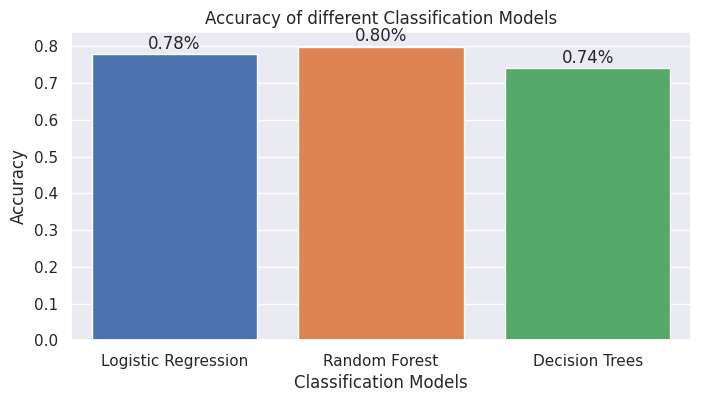

In [77]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x=classifier_names, y=acc_list, saturation =1.5)
plt.xlabel("Classification Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of different Classification Models")
plt.xticks(horizontalalignment = 'center')
plt.yticks()
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/100:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'medium')
plt.show()

### Conclusion:
The desired task has been done and Random Forest Classifier was found to be the most accurate with `80%` accuracy while Decision Trees Classifier with the least accuracy of approx. `74%`